<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ 4. <b>Статистика и </b> <span style="font-weight:bold; color:green">NumPy/SciPy</span></div><hr>
<div style="text-align:center;">Вариант - 1 </div><div style="text-align:right;">Першин М.А. <span style="font-style: italic;font-weight: bold;">(max_pershin@bk.ru)</span></div>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">Домашняя работа</div>
    </div>
</div>

In [1]:
import pandas as pnd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


def getSE(sigma, n):
    return sigma / np.sqrt(n)

def getSE2(sigma1, n1, sigma2, n2):
    return np.sqrt(sigma1**2 / n1 + sigma2**2 / n2)

def getZ(x, mu, se):
    return (x - mu) / se

def getPrByX(x, mu, se):
    return stats.norm.cdf(x, loc=mu, scale=se)

def getPrByZ(z):
    return stats.norm.cdf(z, loc=0, scale=1)

def getZbyPr2Tail(pr):
    return stats.norm.ppf((1-pr)/2, loc=0, scale=1)

def getZbyPr1Tail(pr):
    return stats.norm.ppf(1-pr, loc=0, scale=1)

def getPValue1Tail_Norm(z):
    return 1 - stats.norm.cdf(z, loc=0, scale=1)

def getPValue2Tail_Norm(z):
    return 2 * (stats.norm.cdf(-abs(z), loc=0, scale=1))

def getPValue2Tail_T(t, df):
    return 2 * stats.t.cdf(-abs(t), df=df)

def getPValue1Tail_T(t, df):
    return 1 - stats.t.cdf(t, df=df)

<p><b>Задача 1.</b> Доверительный интервал</p>

<p>После присоединения Криптона было решено оценить в рублях среднюю стоимость бензина в его административном центре. Для этого случайно выбрали 50 заправок (далее - АЗС) из 1000 (значения приведены в файле oil_price_Krypton.csv). Определить с уверенностью в 95% границы, в которых заключено среднее значение стоимости бензина в административном центре, т.е. построить 95% доверительный интерал для средней цены на бензин? Постройте график по данным выборки с доверительным интервалом.</p>

In [30]:
dfOil = pnd.read_csv("oil_price_Krypton.csv")
x = dfOil.mean()
var = dfOil.var(ddof=1)
s = dfOil.std(ddof=1)
prs = np.array([0.95])
se = getSE(s, 50)
lowers, uppers = stats.norm.interval(prs, loc=x, scale=se)
for i in range(len(prs)):
    print("Доверительный интервал для уровня доверия %i%%: (%f, %f)" % (prs[i]*100, lowers[i], uppers[i]))

OilPrice_Krypton    109.952
dtype: float64
Доверительный интервал для уровня доверия 95%: (107.386567, 112.517433)


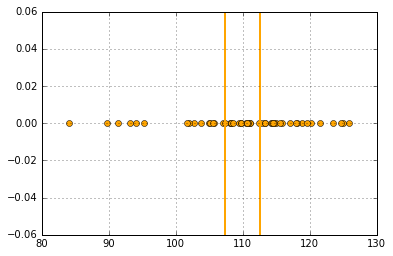

In [3]:
plt.plot(dfOil, np.zeros(len(dfOil)), "o", color="orange")
plt.axvline(107.386567, lw=2, color="orange", linestyle="-")
plt.axvline(112.517433, lw=2, color="orange", linestyle="-")
plt.grid(True)

<p><b>Задача 2.</b> Гипотеза</p>

<p>Решить двумя способами, как показано в Class_6_Examples_CI_Hyp.ipnb, т.е. самостоятельно по формулам и с использованием stats.ttest</p>

<p><b><i>Вариант 1</i></b></p>

<p>До присоединения Криптона в его административном центре средняя цена бензина в переводе на рубли была 90 рублей. Используя данные предыдущей выборки (значения приведены в файле oil_price_Krypton.csv), изменилась ли средняя цена после, т.е. постройте и оцените нулевую гипотезу при уровне значимости 0.05? Постройте график по данным выборки с указанием p-value и уровня значимости.</p>

In [33]:
n = 50
mu = 90
x_bar = x-mu
alpha = 0.05
se = getSE(s, n)
z = getZ(x_bar, 0, se)
print("z =", pvalue)

pvalue = getPValue2Tail_Norm(z)
print("p-value =", pvalue)
print("alpha =", alpha)

if alpha > pvalue:
    print("alpha > p-value")
    print("Отказываемся от нулевой гипотезы: полагаем, что средняя цена бензина изменилась после присоединения Криптона")
else:
    print("alpha <= p-value")
    print("Принимаем нулевую гипотезу: нет достаточных доказательств, что средняя цена бензина изменилась после присоединения Криптона")

z = [  1.82921749e-52]
p-value = [  1.82921749e-52]
alpha = 0.05
alpha > p-value
Отказываемся от нулевой гипотезы: полагаем, что средняя цена бензина изменилась после присоединения Криптона


In [5]:
def getGraphTwo(xran, x_cr, typefunc=0, df=5, lm=0):
    x = np.linspace(xran[0], xran[1], 1000)
    y = []
    
    sdFunc = {0: stats.norm(loc=0, scale=1), 1: stats.t(df=df)}
    x_cr = abs(x_cr) 
    y = sdFunc[typefunc].pdf(x)   
    
    if lm == 0:
        pr = np.around(sdFunc[typefunc].cdf(x_cr) - sdFunc[typefunc].cdf(-x_cr), decimals=3)
        plt.axvspan(-x_cr, x_cr, color="g", alpha=0.1)
        plt.plot(x, y, lw=2, color="green")
        plt.title("Standard Normal Distribution") if typefunc==0 else plt.title("t-distribution")
        
        plt.fill_between(x, 0, y, where=y>sdFunc[typefunc].pdf(x_cr), facecolor='green', alpha=0.5)
        plt.axvline(-x_cr, color="black", linestyle="--")
        plt.axvline(x_cr, color="black", linestyle="--")
        
        plt.annotate("$\gamma("+str(np.around(x_cr, decimals=3))+")="+str(pr)+"$", (0.35,0.4), 
                     fontsize=14, xycoords='axes fraction')     
    
    elif lm == 1:
        pr = np.around(2*sdFunc[typefunc].cdf(-abs(x_cr)), decimals=3)
        plt.plot(x, y, lw=2, color="green")
        plt.axvspan(xran[0], -x_cr, color="g", alpha=0.1)
        plt.axvspan(x_cr, xran[1], color="g", alpha=0.1)
        plt.title("Standard Normal Distribution") if typefunc==0 else plt.title("t-distribution")
        
        plt.fill_between(x, 0, y, where=y<sdFunc[typefunc].pdf(x_cr), facecolor='green', alpha=0.5)
        plt.axvline(-x_cr, color="black", linestyle="--")
        plt.axvline(x_cr, color="black", linestyle="--")
        
        if typefunc == 1: 
            plt.annotate("$F_{two}("+str(np.around(x_cr, decimals=3))+")="+str(pr)+"$", fontsize=14, 
                     xy=(-2.6, 0.01), xycoords='data', xytext=(-1.5, 0.1))#, 
                             #arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
                #plt.annotate("", fontsize=14, xy=(2.6, 0.01), xycoords='data',
                #            xytext=(0.5, 0.09))#, arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
        else:
            plt.annotate("$2\cdot(1 - \Phi("+str(np.around(x_cr, decimals=3))+"))="+str(pr)+"$", 
                         (0.35,0.4), fontsize=14, xycoords='axes fraction')

        #plt.annotate("$\gamma=0.95$", (0.35,0.2), fontsize=14, xycoords='axes fraction')
        
    plt.grid(True)

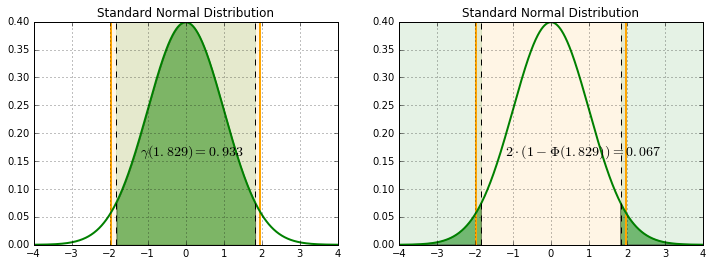

In [22]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
xx = abs(stats.norm.ppf(alpha/2, loc=0, scale=1))
plt.axvline(-xx, lw=2, color="orange", linestyle="-")
plt.axvline(xx, lw=2, color="orange", linestyle="-")
plt.axvspan(-xx, xx, color="orange", alpha=0.1)
getGraphTwo([-4,4], 1.829, lm=0)

plt.subplot(1,2,2)
plt.axvline(-xx, lw=2, color="orange", linestyle="-")
plt.axvline(xx, lw=2, color="orange", linestyle="-")
plt.axvspan(-xx, xx, color="orange", alpha=0.1)
getGraphTwo([-4,4], 1.829, lm=1)

plt.show()

In [62]:
"""
для одномерной выборки мы знаем как найти pvalue двумя способанми только для t-распределения!

x = dfOil.values.astype(np.float32)
tvalue, pvalue_t = stats.ttest_1samp(x, 90)
pvalue_t

if alpha > pvalue_t:
    print("alpha > p-value")
    print("Отказываемся от нулевой гипотезы: полагаем, что средняя цена бензина изменилась после присоединения Криптона")
else:
    print("alpha <= p-value")
    print("Принимаем нулевую гипотезу: нет достаточных доказательств, что средняя цена бензина изменилась после присоединения Криптона")

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-62-5bb486e5354a>, line 13)